In [4]:
import pandas as pd

In [11]:
path = 'C:/Users/dsadm/Desktop/and/iabd/aula09_iabd/Social_Network_Ads.csv'
df = pd.read_csv(path)

In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
dic = {'User ID':'id','Gender':'genero','Age':'idade','EstimatedSalary':'salario','Purchased':'comprou'}

In [13]:
df.rename(columns=dic, inplace=True)

In [14]:
df.head()

,id,genero,idade,salario,comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
df.isnull()

In [ ]:
df.isna()

In [19]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.3, random_state=3)

In [23]:
sc = StandardScaler()
x_treino = sc.fit_transform(x_treino) #normaliza e cria modelo
x_teste = sc.transform(x_teste) #normaliza


In [24]:
algoritmo = SVC(kernel='linear',random_state=3)
algoritmo.fit(x_treino,y_treino)

SVC(kernel='linear', random_state=3)

In [ ]:
y_pred = algoritmo.predict(x_teste)
y_pred

In [26]:
cm = confusion_matrix(y_teste,y_pred)
print(cm)

[[73  5]
 [16 26]]


C:\Users\dsadm\AppData\Local\Temp\ipykernel_18884\2099345247.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


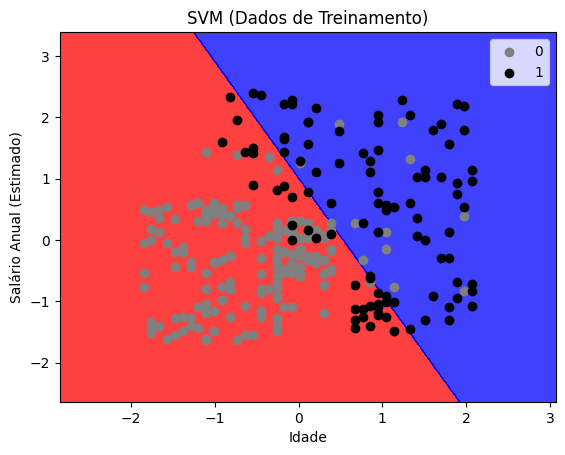

In [29]:
_X, _y = x_treino, y_treino
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('gray', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_18884\664401665.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


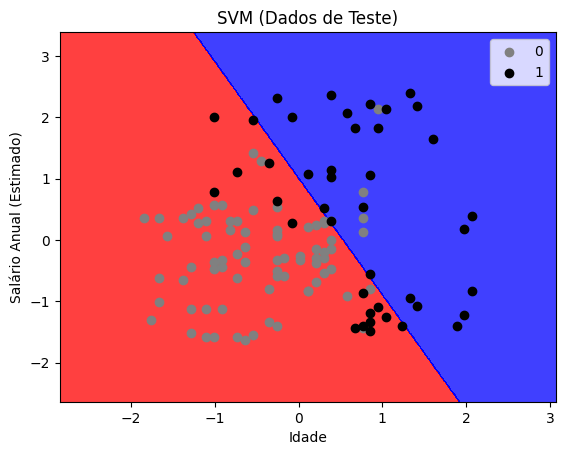

In [30]:
# Visualizando os resultados dos dados de teste:
_X, _y = x_teste,y_teste
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('grey', 'black'))(i), label = j)
plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

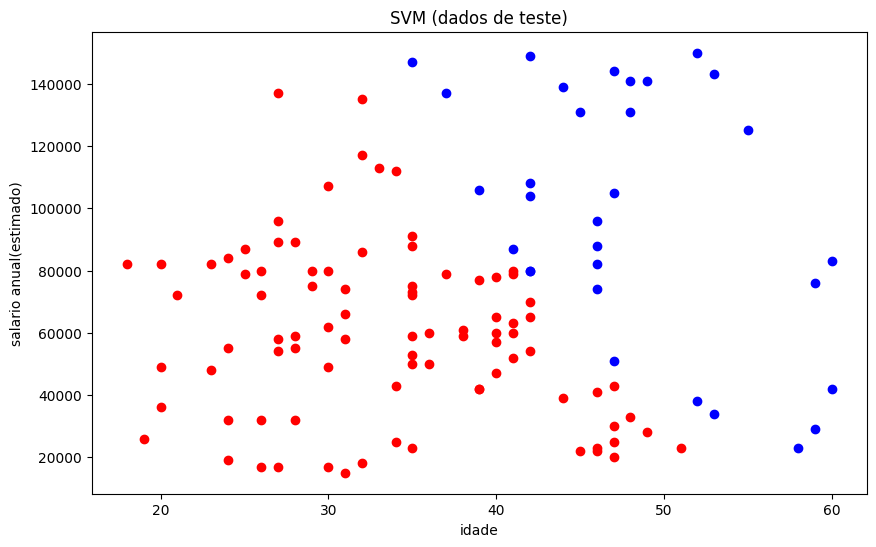

In [27]:
x_teste_inverse = sc.inverse_transform(x_teste)
plt.figure(figsize=(10,6))
plt.scatter(x_teste_inverse[y_pred==0,0],x_teste_inverse[y_pred==0,1], c='red',label='não compra')
plt.scatter(x_teste_inverse[y_pred==1,0],x_teste_inverse[y_pred==1,1], c='blue',label='compra')
plt.title('SVM (dados de teste)')
plt.xlabel('idade')
plt.ylabel('salario anual(estimado)')
plt.show()